In [5]:
#setting system path
#import sys
#sys.path.append('/home/tobiasz820/sws_machine_learning/')
base_path = 'c:/Users/tpiechowiak/OneDrive - GN Store Nord/GNOS data/'

In [6]:
#loading some stuff 
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import pickle
import datetime


In [7]:
#now load the use_time dataframe and the patient dataframe 
with open(base_path + "UseTime_resampled.pkl", "rb") as input_file:
    ADL_use_time = pickle.load(input_file)
print("Read ADL use-time from pickle file")

with open(base_path + "LatestSQLJson.pkl", "rb") as input_file:
    PAT = pickle.load(input_file)
print("Read patient data from pickle file")

Read ADL use-time from pickle file


MemoryError: 

In [ ]:
PAT.keys()

In [ ]:
ADL_use_time = ADL_use_time.rename(columns={"ADLRawData_HearingInstrumentId": "HearingInstrumentId"})

In [ ]:
ADL_use_time['ADL_CreationTime'] = ADL_use_time.index

In [ ]:
new_df = pd.merge(PAT['hearinginstruments'], ADL_use_time, how='inner',\
                  on='HearingInstrumentId')
new_df['CreatedDate'] = pd.to_datetime(new_df['CreatedDate'])
new_df['ModifiedDate'] = pd.to_datetime(new_df['ModifiedDate'])
new_df.index = new_df['ADL_CreationTime']

In [ ]:
new_df.drop(columns = ['ADL_CreationTime','GnosHearingInstrumentId'])

In [ ]:
 (new_df.iloc[0].name - new_df['CreatedDate'].iloc[0])/np.timedelta64(1,'D')

In [4]:
#now loop through the dataframe and compare timestamp and create date 
use_time_re_fit = {}
hi_id_first_fit = []
cutoff = 14 #days
nrWeeks = 12
cnt = 0 
for hi_id, group in new_df.groupby('HearingInstrumentId'):
    tmp = group[['CreatedDate','UseTimeWeekly']]
    tmp.set_index = group.index
    tmp.sort_index()
    
    if (cnt%1000 == 0):
        print('HI =',cnt)    
    
    #less than two weeks after fitting 
    if (abs((tmp.iloc[0].name - tmp['CreatedDate'].iloc[0])/np.timedelta64(1,'D')) < cutoff):        
        
        #three month after first fit         
        if (np.any(tmp['UseTimeWeekly'].iloc[0:nrWeeks] < 0)):
            continue
        
        use_time_re_fit[hi_id] = tmp['UseTimeWeekly'].iloc[0:nrWeeks]        
        hi_id_first_fit.append(hi_id)
        
    cnt = cnt + 1    
    

NameError: name 'new_df' is not defined

In [49]:
abs(tmp['CreatedDate'].iloc[0] - tmp.iloc[0].name)/np.timedelta64(1,'D') < 14

False

In [8]:
#load the data
with open(base_path + "Use_time_first_fit.pkl", "rb") as input_file:
    Use_time = pickle.load(input_file)
print("Read use-time from first fit from pickle file")

with open(base_path + "First_fit_hi_id.pkl", "rb") as input_file:
    hi_id_first_fit = pickle.load(input_file)
print("Read hi's from first fit from pickle file")


Read use-time from first fit from pickle file
Read hi's from first fit from pickle file


In [13]:
range(len(Use_time))

range(0, 627)

(0, 24)

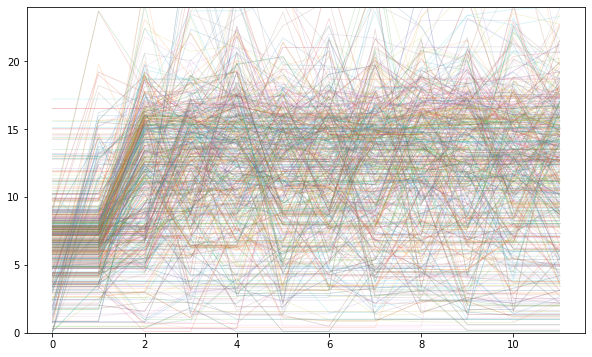

In [19]:
#plot the usetimes 
t = range(0,12)
fig = plt.figure(figsize=(10,6))
for idx in range(len(Use_time)): 
    plt.plot(t,Use_time[idx], linewidth=0.7, alpha=0.2)
    
axes = fig.gca()
axes.set_ylim([0,24])

In [27]:
def seek_cluster_number(X, max_clust):
    SSE = []
    km = []
    cnt = 0
    for idx in range(1, max_clust):
        cnt = cnt + 1        
        print('Iteration = ',cnt)
        tmp = KMeans(n_clusters = idx, \
                    init = 'k-means++',\
                    n_init = 20,\
                    max_iter = 100,\
                    random_state = 0)
        tmp.fit(X)
        SSE.append(tmp.inertia_)
        km.append(tmp)
    plt.plot(range(1,max_clust), SSE, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.show()
    return km

Iteration =  1
Iteration =  2
Iteration =  3
Iteration =  4
Iteration =  5
Iteration =  6
Iteration =  7
Iteration =  8
Iteration =  9


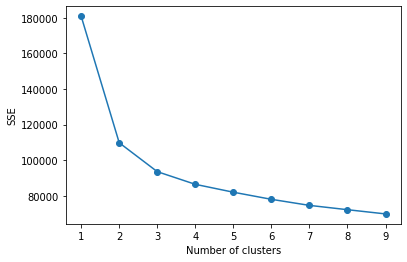

In [28]:
#cluster first fit use time for 12 weeks 
from sklearn.cluster import KMeans
km = seek_cluster_number(Use_time,10)

In [29]:
km[1].cluster_centers_

array([[ 7.36368392,  8.5493643 , 12.8435082 , 13.93124864, 14.72219278,
        13.54029723, 13.72297139, 14.03791652, 14.2963863 , 14.44945103,
        14.30760454, 14.19229167],
       [ 4.94192144,  5.16583368,  7.27603595,  7.18204736,  6.84299051,
         7.06160298,  7.11876133,  7.04010688,  6.99017226,  6.21370935,
         6.32856747,  6.29599143]])